In [1]:
import pandas as pd

def get_dataframe(model, config):
    df = pd.read_json(f"../results/{model}/basquetrivia_{config}_5-shot.jsonl", lines=True)
    return df

In [2]:
df_gpt35turbo_basquetrivia_eu = get_dataframe("gpt-3.5-turbo-0125", "eu")

df_gpt35turbo_basquetrivia_en = get_dataframe("gpt-3.5-turbo-0125", "en")

df_gpt4turbo_basquetrivia_eu = get_dataframe("gpt-4-0125-preview", "eu")

df_gpt4turbo_basquetrivia_en = get_dataframe("gpt-4-0125-preview", "en")


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dataframe_basquetrivia(df):
    # add acc column 1 if correct else 0
    df["acc"] = df.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    
    mean_accuracy = df["acc"].mean()
    display(mean_accuracy)
    
    # group by the "group" column and calculate the mean accuracy for each group
    # group attribute is in dict "doc"
    grouped = df.groupby("group")["acc"].mean()

    # group by the "difficulty" column and calculate the mean accuracy for each difficulty
    # difficulty attribute is in dict "doc"
    grouped_difficulty = df.groupby("difficulty")["acc"].mean()

    # group by the "category" column and calculate the mean accuracy for each category
    # category attribute is in dict "doc"
    grouped_category = df.groupby("category")["acc"].mean()

    # group by the "group" and "category" columns and calculate the mean accuracy for each group and category combination
    grouped_group_category = df.groupby(["category", "group"])["acc"].mean()

    # group by the "difficulty" and "category" columns and calculate the mean accuracy for each difficulty and category combination
    grouped_difficulty_category = df.groupby(["category", "difficulty"])["acc"].mean()

    # group by the "group" and "difficulty" columns and calculate the mean accuracy for each group and difficulty combination
    grouped_group_difficulty = df.groupby(["difficulty", "group"])["acc"].mean()

    # plot the results
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    display(grouped)
    # grouped_difficulty.plot(kind="bar", ax=axs[0, 1], rot=0, title="Accuracy by Difficulty")
    grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    display(grouped_category)
    
    # grouped_group_category.unstack().plot(kind="bar", ax=axs[1, 1], rot=90, title="Accuracy by Category and Group")
    
    # grouped_difficulty_category.unstack().plot(kind="bar", ax=axs[2, 0], rot=90, title="Accuracy by Difficulty and Category")
    
    # grouped_group_difficulty.unstack().plot(kind="bar", ax=axs[2, 1], rot=0, title="Accuracy by Group and Difficulty")


0.5679142136248949

group
Euskal gaiak     0.472504
Gai orokorrak    0.662207
Name: acc, dtype: float64

category
Euskara eta literatura     0.526829
Geografia eta Historia     0.591667
Gizartea eta ohiturak      0.560477
Kirola eta aisialdia       0.569282
Kultura eta artea          0.580034
Musika eta dantza          0.544992
Zientzia eta teknologia    0.574830
Zinema eta ikuskizunak     0.596315
Name: acc, dtype: float64

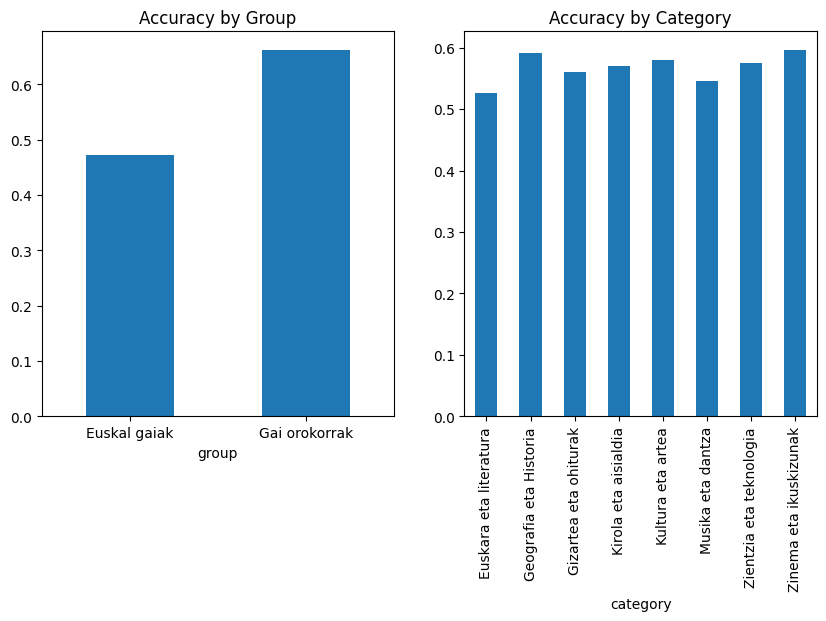

In [4]:
plot_dataframe_basquetrivia(df_gpt35turbo_basquetrivia_eu)

In [23]:
def plot_eu_en_sizes(df_gpt35turbo_basquetrivia_eu, df_gpt35turbo_basquetrivia_en, df_gpt4turbo_eustrivia, df_gpt4turbo_eustrivia_itzuli):
    merged = pd.DataFrame()
    merged["M=GPT3.5 Turbo D=EU"] = df_gpt35turbo_basquetrivia_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo D=EN"] = df_gpt35turbo_basquetrivia_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo    D=EU"] = df_gpt4turbo_eustrivia.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo    D=EN"] = df_gpt4turbo_eustrivia_itzuli.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["group"] = df_gpt35turbo_basquetrivia_eu["group"]
    merged["difficulty"] = df_gpt35turbo_basquetrivia_eu["difficulty"]
    merged["category"] = df_gpt35turbo_basquetrivia_eu["category"]
    
    merged_mean = merged.mean()
    display((merged_mean * 100).round(2))

    merged_grouped = merged.groupby("group").mean()
    merged_grouped_difficulty = merged.groupby("difficulty").mean()
    merged_grouped_category = merged.groupby("category").mean()
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    #merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean()
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    display((merged_group_category.T * 100).round(2))
    merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)

/tmp/ipykernel_12831/1100999906.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_mean = merged.mean()


M=GPT3.5 Turbo D=EU      56.79
M=GPT3.5 Turbo D=EN      68.82
M=GPT4 Turbo    D=EU     79.39
M=GPT4 Turbo    D=EN     81.98
difficulty              192.66
dtype: float64

/tmp/ipykernel_12831/1100999906.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped = merged.groupby("group").mean()
/tmp/ipykernel_12831/1100999906.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_difficulty = merged.groupby("difficulty").mean()
/tmp/ipykernel_12831/1100999906.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_category = merged.groupby("category").m

group,Euskal gaiak,Gai orokorrak
M=GPT3.5 Turbo D=EU,47.25,66.22
M=GPT3.5 Turbo D=EN,55.08,82.40
M=GPT4 Turbo D=EU,69.46,89.21
M=GPT4 Turbo D=EN,72.17,91.68


category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
M=GPT3.5 Turbo D=EU,52.68,59.17,56.05,56.93,58.00,54.50,57.48,59.63
M=GPT3.5 Turbo D=EN,63.09,70.83,74.96,68.61,68.67,60.44,73.47,70.69
M=GPT4 Turbo D=EU,77.56,81.00,86.54,79.47,82.27,70.97,79.25,78.22
M=GPT4 Turbo D=EN,80.81,83.83,87.73,81.80,86.57,71.65,83.50,80.07


difficulty,1,2,3
M=GPT3.5 Turbo D=EU,62.34,56.15,50.64
M=GPT3.5 Turbo D=EN,78.53,66.99,58.94
M=GPT4 Turbo D=EU,84.99,78.07,74.05
M=GPT4 Turbo D=EN,87.43,81.19,76.14


category             Euskara eta literatura                \
group                          Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU                   43.93         61.29   
M=GPT3.5 Turbo D=EN                   51.48         74.52   
M=GPT4 Turbo    D=EU                  70.16         84.84   
M=GPT4 Turbo    D=EN                  75.41         86.13   

category             Geografia eta Historia                \
group                          Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU                   47.33         71.00   
M=GPT3.5 Turbo D=EN                   56.67         85.00   
M=GPT4 Turbo    D=EU                  72.67         89.33   
M=GPT4 Turbo    D=EN                  77.67         90.00   

category             Gizartea eta ohiturak               Kirola eta aisialdia  \
group                         Euskal gaiak Gai orokorrak         Euskal gaiak   
M=GPT3.5 Turbo D=EU                  51.56         60.40                47.64   
M=GPT3.5 Turbo D=EN                  64.36         85.23                55.07   
M=GPT4 Turbo    D=EU                 83.04         89.93                67.91   
M=GPT4 Turbo    D=EN                 83.04         92.28                70.27   

category                           Kultura eta artea                \
group                Gai orokorrak      Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU          66.01             46.10         70.28   
M=GPT3.5 Turbo D=EN          81.85             53.56         84.27   
M=GPT4 Turbo    D=EU         90.76             72.20         92.66   
M=GPT4 Turbo    D=EN         93.07             76.61         96.85   

category             Musika eta dantza               Zientzia eta teknologia  \
group                     Euskal gaiak Gai orokorrak            Euskal gaiak   
M=GPT3.5 Turbo D=EU              41.87         66.67                   49.32   
M=GPT3.5 Turbo D=EN              42.21         78.00                   62.33   
M=GPT4 Turbo    D=EU             53.98         87.33                   71.92   
M=GPT4 Turbo    D=EN             52.94         89.67                   76.03   

category                           Zinema eta ikuskizunak                
group                Gai orokorrak           Euskal gaiak Gai orokorrak  
M=GPT3.5 Turbo D=EU          65.54                  50.34         68.90  
M=GPT3.5 Turbo D=EN          84.46                  55.03         86.29  
M=GPT4 Turbo    D=EU         86.49                  63.76         92.64  
M=GPT4 Turbo    D=EN         90.88                  65.10         94.98

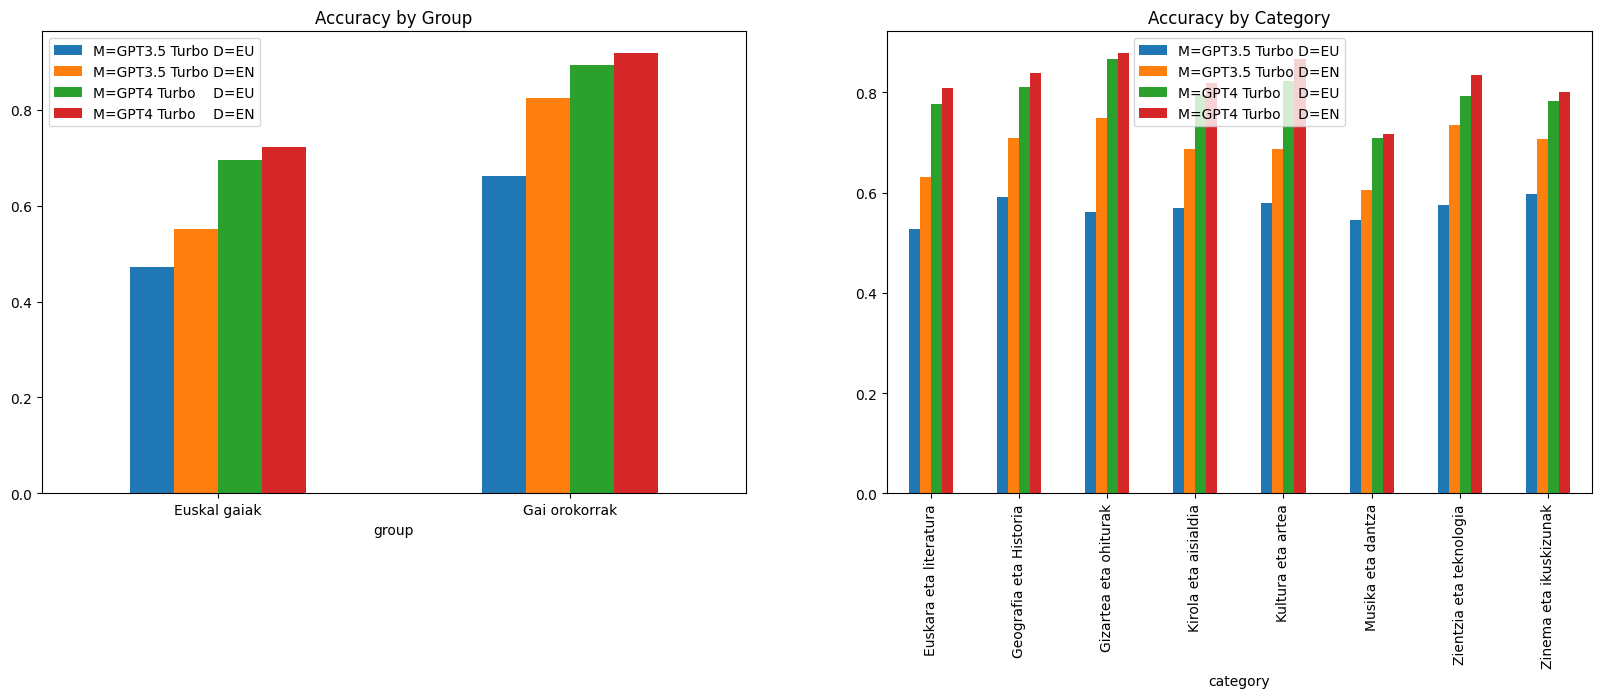

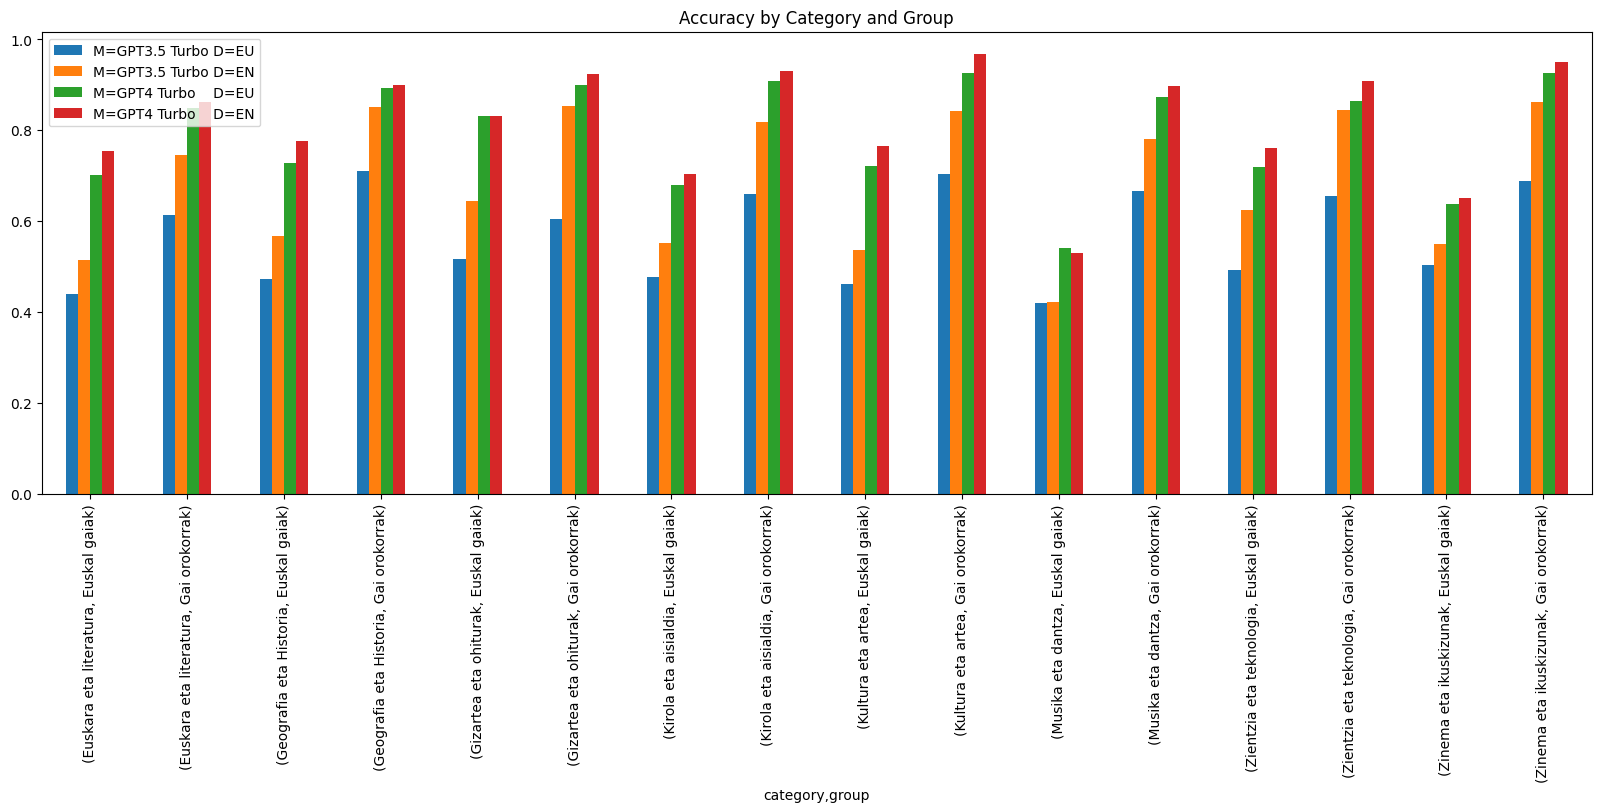

In [24]:
plot_eu_en_sizes(df_gpt35turbo_basquetrivia_eu, df_gpt35turbo_basquetrivia_en, df_gpt4turbo_basquetrivia_eu, df_gpt4turbo_basquetrivia_en)